#### Vergleich Oracle-Werte aus den Simulationen mit verschiedenen R2-Parametern

In [1]:
# Notwendige Bibliotheken und Funktionen importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Laden der Ergebnisse
df_trunc_atte = pd.read_csv('Code/Simulationen mit verschiedenen R2 Parametern/Ergebnisse/trunc_atte_r2.csv')
df_trunc_ate = pd.read_csv('Code/Simulationen mit verschiedenen R2 Parametern/Ergebnisse/trunc_ate_r2.csv')
df_discard_atte = pd.read_csv('Code/Simulationen mit verschiedenen R2 Parametern/Ergebnisse/discard_atte_r2.csv')
df_discard_ate = pd.read_csv('Code/Simulationen mit verschiedenen R2 Parametern/Ergebnisse/discard_ate_r2.csv')

#### Truncation

In [18]:
# den durchschnittlichen Oracle-Wert für jeden R2_d und R2_y Kombination berechnen
R2_d_values = [0.35, 0.5, 0.65, 0.8]
R2_y_values = [0.35, 0.5, 0.65, 0.8]

results_trunc = []
for res, res_name in zip([df_trunc_atte, df_trunc_ate], ['ATTE', 'ATE']):
    for R2_y in R2_y_values:
        df_r2y = res.loc[res['R2_y'] == R2_y]
        for R2_d in  R2_d_values:
            df = df_r2y.loc[df_r2y['R2_d'] == R2_d]
            for trim_value in df['trim_value'].unique():
                df_trunc = df.loc[df['trim_value'] == trim_value]
                rows = {                
                    'estimand': res_name,
                    'R2_y': R2_y,
                    'R2_d': R2_d,
                    'trim_value': trim_value,
                    'mean_oracle': df_trunc['oracle'].mean().round(4)
                }
                results_trunc.append(rows)
df_results_trunc = pd.DataFrame(results_trunc)             

#### Discarding

In [19]:
# den durchschnittlichen Oracle-Wert für jede R2_d und R2_y Kombination und Schwellenwert berechnen
results_discard = []
for res, res_name in zip([df_discard_atte, df_discard_ate], ['ATTE', 'ATE']):
    for R2_y in  R2_y_values:
        df_r2y = res.loc[res['R2_y'] == R2_y]
        for R2_d in  R2_d_values:
            df = df_r2y.loc[df_r2y['R2_d'] == R2_d]
            for trim_value in df['trim_value'].unique():
                df_discard = df.loc[df['trim_value'] == trim_value]
                rows = {                
                    'estimand': res_name,
                    'R2_d': R2_d,
                    'R2_y': R2_y,
                    'trim_value': trim_value,
                    'mean_oracle': df_discard['oracle'].mean().round(4)
                }
                results_discard.append(rows)
df_results_discard = pd.DataFrame(results_discard)

#### Vergleich der Oracle-Werte für die Truncation und Discarding Strategien

In [20]:
# Ergebnisse für Truncation und Discarding zusammenführen
results = []
for res, method in zip([df_results_trunc, df_results_discard], ['Truncation', 'Discarding']):
    for R2_y in R2_y_values:
        df_r2y = res.loc[res['R2_y'] == R2_y]
        for R2_d in  R2_d_values:
            df = df_r2y.loc[df_r2y['R2_d'] == R2_d]
            for est in ['ATTE', 'ATE']:
                df_est = df.loc[df['estimand'] == est]
                for trim_value in df_est['trim_value'].unique():
                    df_tv = df_est.loc[df_est['trim_value'] == trim_value]
                    rows = {                
                        'method': method,
                        'estimand': est,
                        'R2_d': R2_d,
                        'R2_y': R2_y,
                        'trim_value': trim_value,                        
                        'mean_oracle': df_tv['mean_oracle'].iloc[0],
                    }
                    results.append(rows)
df_results = pd.DataFrame(results)

In [21]:
# Ergebnisse für ATTE, Discarding Stratege und Schwellenwert von 0.1
df_results[(df_results['method'] == 'Discarding') & (df_results['estimand'] == 'ATTE') & (df_results['trim_value'] == 0.1)]

,method,estimand,R2_d,R2_y,trim_value,mean_oracle
131,Discarding,ATTE,0.35,0.35,0.1,0.2999
139,Discarding,ATTE,0.50,0.35,0.1,0.2898
147,Discarding,ATTE,0.65,0.35,0.1,0.2625
155,Discarding,ATTE,0.80,0.35,0.1,0.2118
163,Discarding,ATTE,0.35,0.50,0.1,0.4087
171,Discarding,ATTE,0.50,0.50,0.1,0.3949
179,Discarding,ATTE,0.65,0.50,0.1,0.3577
187,Discarding,ATTE,0.80,0.50,0.1,0.2886
195,Discarding,ATTE,0.35,0.65,0.1,0.5570
203,Discarding,ATTE,0.50,0.65,0.1,0.5381


In [22]:
# Ergebnisse für ATTE, Discarding Stratege und Schwellenwert von 0.05
df_results[(df_results['method'] == 'Discarding') & (df_results['estimand'] == 'ATTE') & (df_results['trim_value'] == 0.05)]

,method,estimand,R2_d,R2_y,trim_value,mean_oracle
130,Discarding,ATTE,0.35,0.35,0.05,0.3411
138,Discarding,ATTE,0.50,0.35,0.05,0.3541
146,Discarding,ATTE,0.65,0.35,0.05,0.3357
154,Discarding,ATTE,0.80,0.35,0.05,0.2851
162,Discarding,ATTE,0.35,0.50,0.05,0.4649
170,Discarding,ATTE,0.50,0.50,0.05,0.4826
178,Discarding,ATTE,0.65,0.50,0.05,0.4575
186,Discarding,ATTE,0.80,0.50,0.05,0.3886
194,Discarding,ATTE,0.35,0.65,0.05,0.6335
202,Discarding,ATTE,0.50,0.65,0.05,0.6577


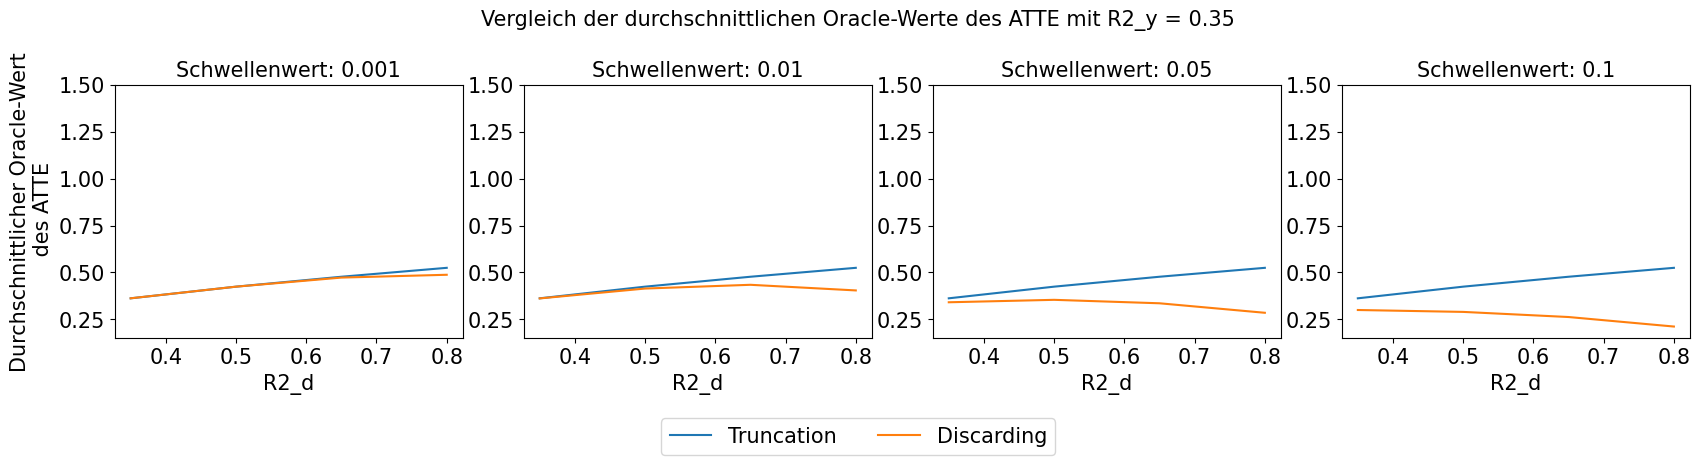

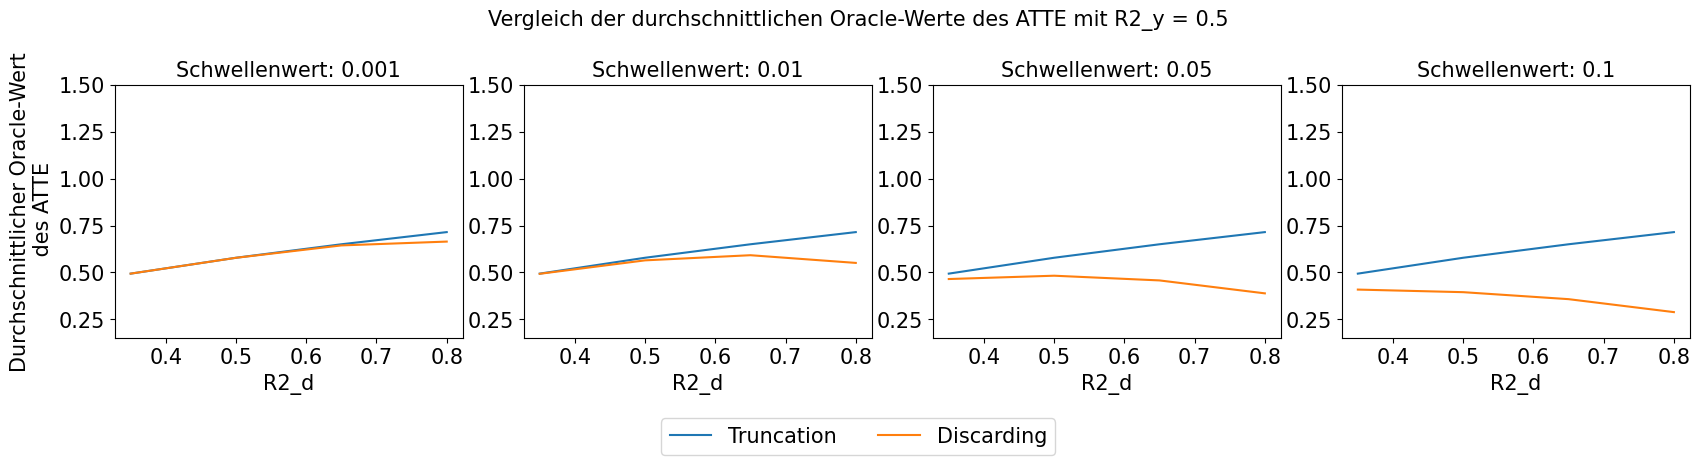

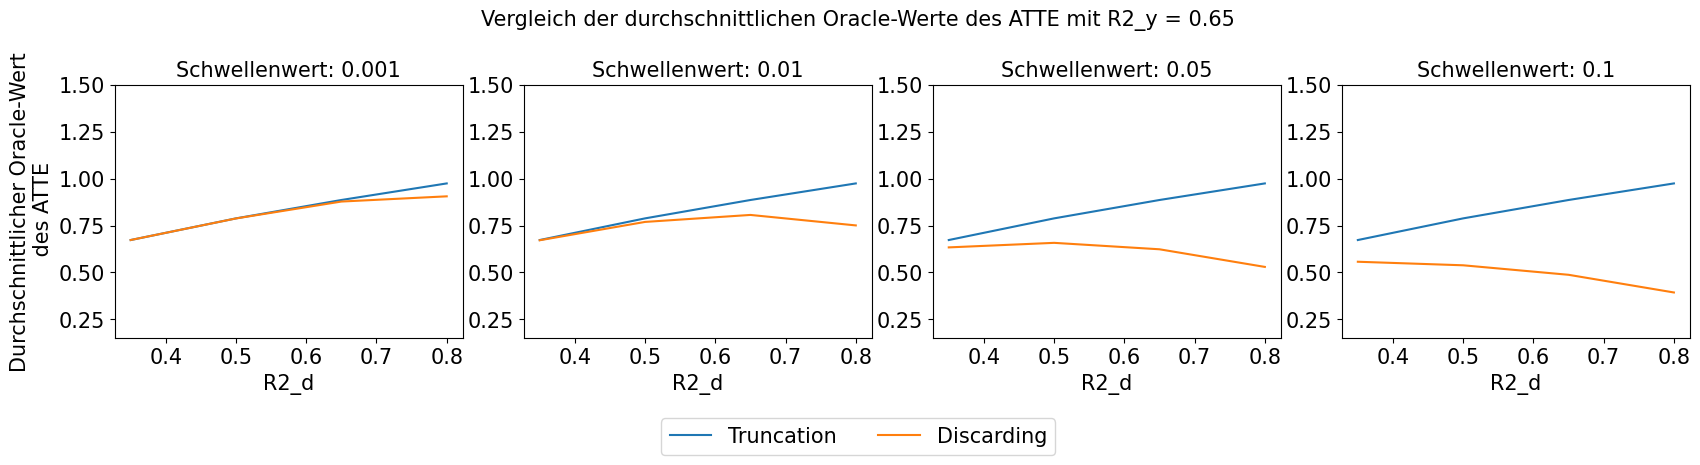

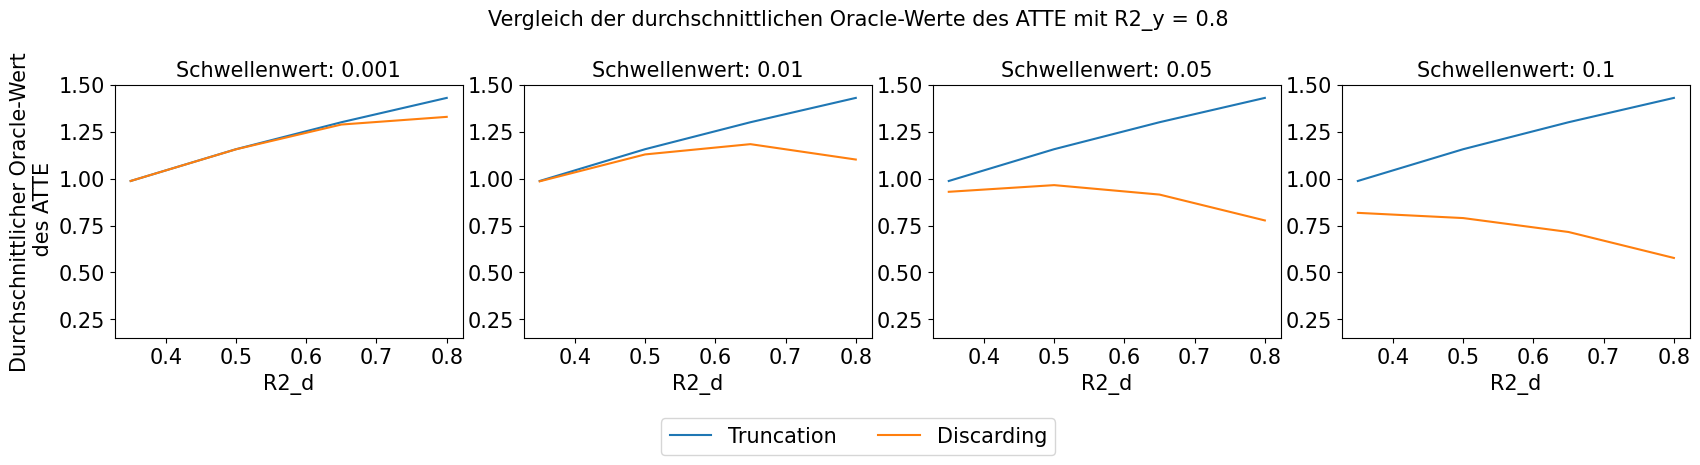

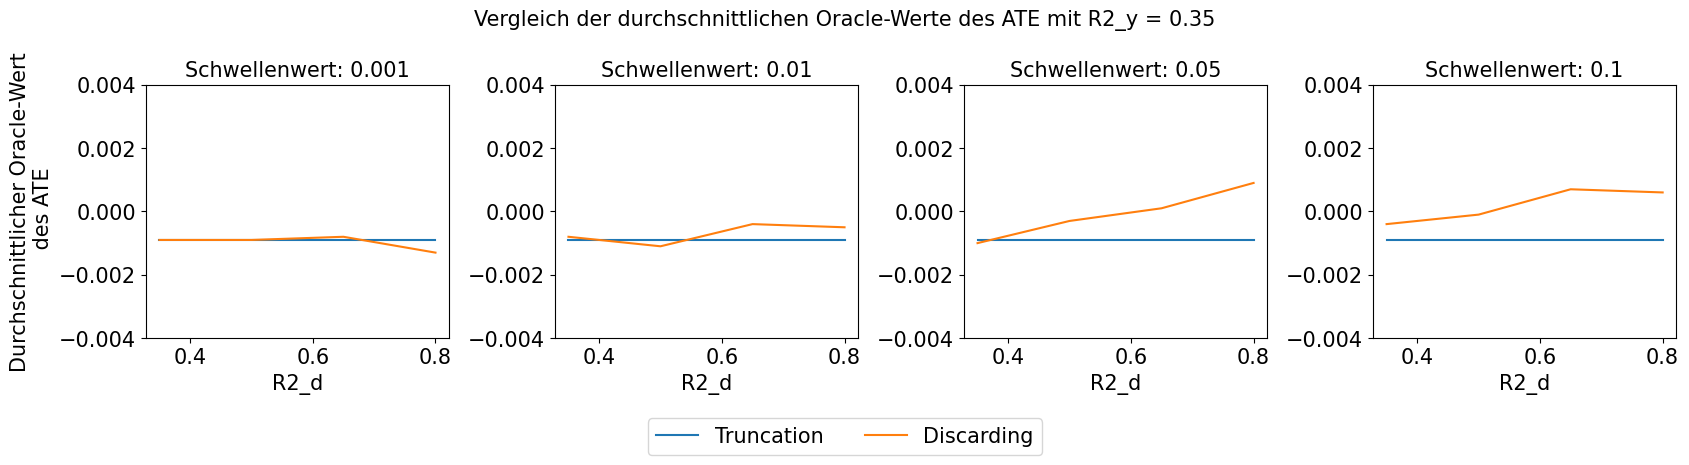

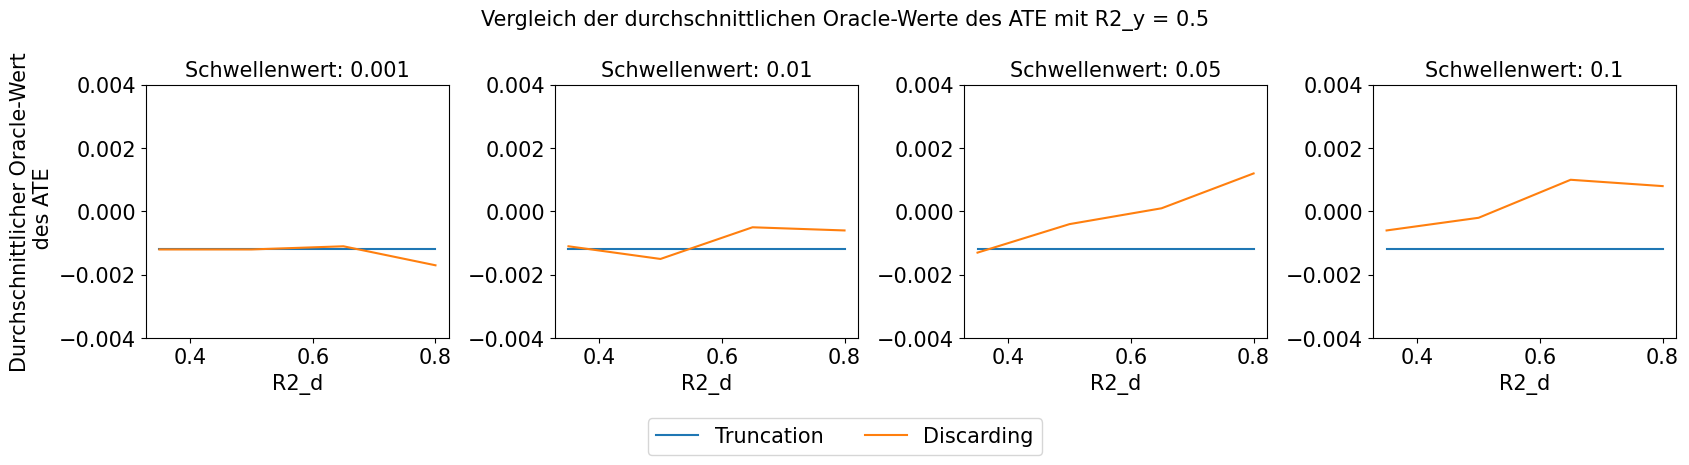

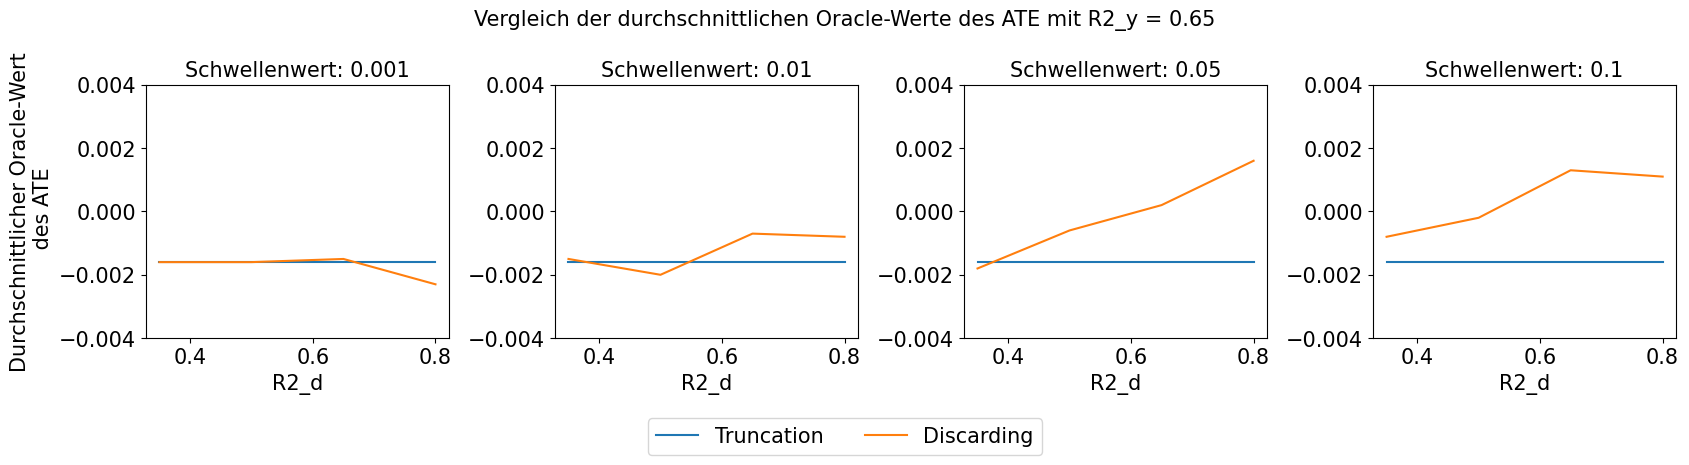

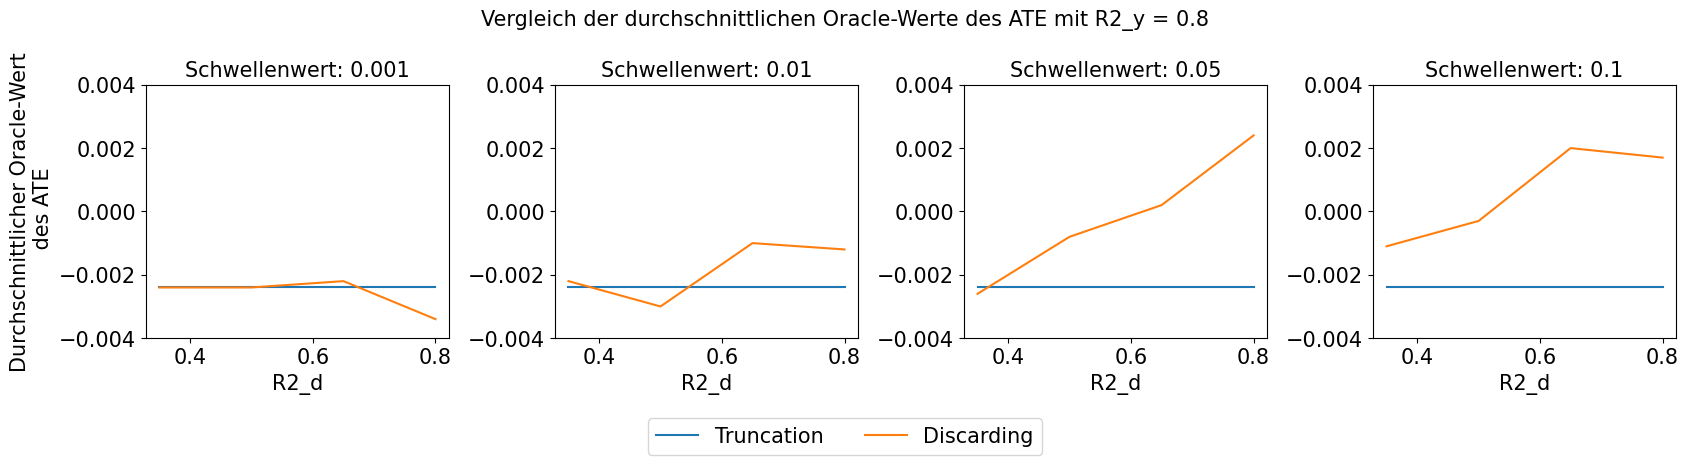

In [23]:
# Plot der Mean Oracle Werte für ATTE und ATE und für jeden R2_y Wert
for est in ['ATTE', 'ATE']:
    for R2_y in R2_y_values:
        fig, axes = plt.subplots(1, 4, figsize=(17, 4))
        axes = axes.flatten()
        plot_index = 0
        for trim_value in df_results['trim_value'].unique():
            ax = axes[plot_index]
            t = df_results.loc[(df_results['R2_y']==R2_y) & (df_results['estimand'] == est) & (df_results['trim_value'] == trim_value) & (df_results['method'] == 'Truncation')]
            d = df_results.loc[(df_results['R2_y']==R2_y) & (df_results['estimand'] == est) & (df_results['trim_value'] == trim_value) & (df_results['method'] == 'Discarding')]
            ax.plot(t['R2_d'], t['mean_oracle'], label='Truncation')
            ax.plot(d['R2_d'], d['mean_oracle'], label='Discarding')
            # Schriftgröße der Achsenticks anpassen
            ax.tick_params(axis='both', labelsize=15)
            ax.set_title(f'Schwellenwert: {trim_value}', fontsize=15)
            ax.set_xlabel('R2_d', fontsize=15)
            axes[0].set_ylabel(f'Durchschnittlicher Oracle-Wert\n des {est}', fontsize=15)
            if est == 'ATTE':
                ax.set_ylim(0.15, 1.5)
            else:
                ax.set_ylim(-0.004, 0.004)
            plot_index += 1

        # Legende global platzieren
        fig.legend(
            labels=['Truncation', 'Discarding'],  
            loc='lower center',                  
            bbox_to_anchor=(0.5, -0.14),        
            ncol=2,
            fontsize=15
        )
        plt.suptitle(f'Vergleich der durchschnittlichen Oracle-Werte des {est} mit R2_y = {R2_y}', fontsize=15, y=1.0)
        plt.tight_layout()
        plt.show()